# Importuri

In [1]:
from numpy.random import seed
seed(888)
import tensorflow as tf
tf.random.set_seed(404)

In [90]:
import os
import numpy as np
import itertools

import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

from IPython.display import display
from keras.preprocessing.image import array_to_img
from keras.callbacks import TensorBoard

from time import strftime

from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

# Constante

In [83]:
LOG_DIR = 'tensorboard_cifar_logs/'

LABEL_NAME = ['Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog','Horse', 'Ship', 'Truck']
IMAGE_WIDTH = 32
IMAGE_HEIGH = 32
IMAGE_PIXELS = IMAGE_WIDTH * IMAGE_HEIGH
COLOR_CHANNELS = 3
TOTAL_INPUTS = IMAGE_PIXELS * COLOR_CHANNELS
NR_CLASSES = 10

VALIDATION_SIZE = 10000
SMALL_TRAIN_SIZE = 1000

# Optinem datele

In [4]:
(x_train_all, y_train_all ), (x_test, y_test) = cifar10.load_data()

In [5]:
type(cifar10)
type(x_train_all)

numpy.ndarray

# Explorarea datelor

In [6]:
x_train_all[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

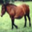

In [7]:
pic =array_to_img(x_train_all[7])
display(pic)

In [8]:
y_train_all.shape

(50000, 1)

In [9]:
y_train_all[7][0]

7

In [10]:
LABEL_NAME[y_train_all[7][0]]

'Horse'

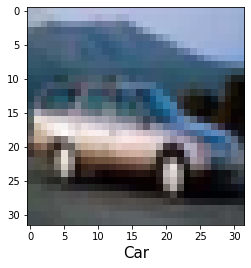

In [11]:
plt.imshow(x_train_all[4])
plt.xlabel(LABEL_NAME[y_train_all[4][0]], fontsize = 15)
plt.show()

** Provocare: ** Scrieți o buclă pentru a afișa primele 10 imagini din tabloul `` x_train_all``` la rând. Afișați numele etichetei de sub imagine. Îndepărtați semnele urâte de căpușă. * Sugestie * utilizați matplotlib.

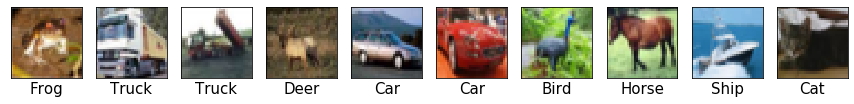

In [12]:
plt.figure(figsize=(15,5))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.yticks([])
    plt.xticks([])
    plt.xlabel(LABEL_NAME[y_train_all[i][0]], fontsize = 15)
    plt.imshow(x_train_all[i])

In [13]:
x_train_all[0].shape

(32, 32, 3)

In [14]:
nr_images, x, y, c = x_train_all.shape
print(f'images = {nr_images} \t| width = {x} \t| height = {y} \t| channels = {c}')

images = 50000 	| width = 32 	| height = 32 	| channels = 3


In [15]:
x_test.shape

(10000, 32, 32, 3)

# Pre-Procesarea Datelor

In [16]:
type(x_train_all[0][0][0][0])

numpy.uint8

In [17]:
x_train_all, x_test = x_train_all / 255.0 , x_test /255#convert to float si aducem aceste valori intre 1 si 0 , datorita rate de invatare pt ca va face viata mai usoara pt a calcul si optimiza weights

In [18]:
type(x_train_all[0][0][0][0])

numpy.float64

In [19]:
x_train_all[0][0][0][0]

0.23137254901960785

In [20]:
len(x_train_all)

50000

In [21]:
# flattened,e mult mai usor conceptula.  din ce 4d le vom transforma intr-o dimensiune
x_train_all = x_train_all.reshape(x_train_all.shape[0], TOTAL_INPUTS)

In [22]:
x_train_all.shape

(50000, 3072)

In [23]:
x_test = x_test.reshape(len(x_test), TOTAL_INPUTS)
print(f'Shape of x_test is {x_test.shape}')

Shape of x_test is (10000, 3072)


# Creare Validation Dataset

In [24]:
x_val = x_train_all[:VALIDATION_SIZE]
y_val = y_train_all[:VALIDATION_SIZE]
x_val.shape

(10000, 3072)

** Provocare: ** Creează două tablouri numpy `` `x_train``` și` `` y_train``` care au forma (40000, 3072) și respectiv (40000, 1). Acestea trebuie să conțină ultimele 40000 de valori de la `` `x_train_all``` și respectiv` `y_train_all```.

In [25]:
x_train = x_train_all[VALIDATION_SIZE:]
y_train = y_train_all[VALIDATION_SIZE:]
x_train.shape

(40000, 3072)

# Careare o baza de date mai mica (pentru ilustrare)

In [26]:
x_train_xs = x_train[:SMALL_TRAIN_SIZE]
y_train_xs = y_train[:SMALL_TRAIN_SIZE]

 In keras primul layer va fi Hiddent layer va trebui sa spunem cate inputuri sunt in acest hiddent layer acestea. Cand vorbim de o imagine nr de inputuri va fi determinat de rezolutia acele imagini si de spatiul de culoare a imagini. Daca imagine are o rezolutie 32 x 32 si este si color adica 3, noi vom aproviziona hiddent layer cu 32 * 32 *3 adica 3072.

### Pentru primul strat  cel de inceput, va avaea input_dim care va reprezenta dimensiunea imaginie de intrare sau datele de intrare sau baza de date

Dense(units(nr de neuroni)=6, input_dim=3072, functia de activare= 'relu')
### Pentru al doilea strat(layer)
Dense(unite(nr de neuroni) =5, functia de activare='relu')
### Pentu ultimul strat cel de output
Dense(unite(nr de neuron)= 4, functia de activare ='softmax')

# Functia de activare
softmax transforma outputurile in probabilitati

# Definire Neural Network folosind Keras

In [47]:
model_1 = Sequential([
    Dense(units=128, input_dim=TOTAL_INPUTS, activation='relu', name='m1_hidden1'),# putem da acestor layer un nume  cu ajutorul lui 'name='
    Dense(units=64, activation='relu', name='m1_hidden2'),
    Dense(units=16, activation='relu', name='m1_hidden3'),
    Dense(units=10, activation='softmax', name='m1_output')
])

In [28]:
type(model_1)

keras.engine.sequential.Sequential

# loss function: 
#una dintre ele este MSE aceata este folosita pentru regresii
# pentru clasificare este folosita 'Categorical Cross Entropy' masoara performanta modelulu de clasificare care ofera o valoare de probabilitate între 0 si 1 ca output.
# Deci ceea ce ne spune această funcție este că categorical_cross_entropy_loss penalizează cu adevărat predicțiile care sunt atât de încrezătoare cât și  greșite
# sunt multe categorical_cross_entropy dar cel mai eficent este sparse_categorical_crossentropy
# Formula 
# Este suma pentru toate categoriile din valoarea reală pentru label =>  $-\sum_{i} y_i$
# Acest y poate fi 1 ori 0 si dupa acea va fi multiplicat cu logaritmul probabilitatilor predictate
# $CE = -\sum_{i} y_i\ log \hat y_i$
# $CE = - \big( y_1\ log(\hat y_1) + y_2\ log(\hat y_2)\big)$
# $CE = - \big( 1\ *\ log(1) + 0\ log(0)\big)$
# $CE = - \big( 1\ *0 + 0*1\big) = 0$

optimiser => Gradient descent
este un algoritm care calculeaza loss(pierdera) si ajusteaza weights
optimiser poate creste viteza de instruire cand ai un model deficil si  multe elemente de instruit acesta facand diferenta dintre cateva ore si cateva zile in a termin de instruit.
celm mai folosit este Adam

In [48]:
model_1.compile(optimizer='adam', 
                loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

In [30]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
m1_hidden1 (Dense)           (None, 128)               393344    
_________________________________________________________________
m1_hidden2 (Dense)           (None, 64)                8256      
_________________________________________________________________
m1_hidden3 (Dense)           (None, 16)                1040      
_________________________________________________________________
m1_output (Dense)            (None, 10)                170       
Total params: 402,810
Trainable params: 402,810
Non-trainable params: 0
_________________________________________________________________


Bias este ceea ce poate schimba întreaga curbă, astfel încât dacă aceste lucruri de remorcare greutățile și funcția de părtinire și activare individuală pot fi manipulate, poate fi întinsă, poate fi făcută abruptă sau plană sau deplasată în sus sau deplasată în jos sau deplasată spre stânga sau deplasată spre dreapta

In [31]:
32*32*3*128 + 128 #parametri = width * height * color * nr_neuroni + Bias


393344

In [32]:
32*32*3*128 + 128 + (128*64+ 64) +(64*16+16)+ (16*10+10)# (128 este inputul de neuroni), = total parametri

402810

# Tensorbord(vizualizare invatare)

In [33]:
def get_tensorboard(model_name):

    folder_name = f'{model_name} at {strftime("%H %M")}'# python doc=https://docs.python.org/2/library/datetime.html
    dir_paths = os.path.join(LOG_DIR, folder_name)

    try:
        os.makedirs(dir_paths)
    except OSError as err:
        print(err.strerror)
    else:
        print('Successfully created directory')

    return TensorBoard(dir_paths)

In [34]:
TensorBoard()

In [35]:
get_tensorboard('model_1')

Successfully created directory


folder_name = f'model_1 at {strftime("%H %M")}'# python doc=https://docs.python.org/2/library/datetime.html
dir_paths = os.path.join(LOG_DIR, folder_name)
try:
    os.makedirs(dir_paths)
except OSError as err:
    print(err.strerror)
else:
    print('Successfully created directory')
TensorBoard(log_dir=dir_paths)

# Fit Nodel (Intruire Model)

# Epoch este cand inreaga baza de date a  trecut prin neural network o singura data
# cand ai o baza de data mare de obicei va trebui sa o inparti baza de date si proceseaza o singura piesa per time. o singura piesa se numeste Batch daca vei inparti baza de date vei instrui modelul pe un singur batch at time ce ce inseamna ca va dura mai multe iteratii pentru a trece prin toata baza de date.
# Formula iteratiei
# $iteratie = \frac {Nr of Training Samples}{Nr of samples in the batch(Batch Size) }$



In [36]:
sample_per_batch =1000

In [37]:
%%time
nr_epochs = 150
model_1.fit(x_train_xs, y_train_xs,
             batch_size=sample_per_batch,
              epochs=nr_epochs, 
              verbose=1,   #verbose poate afisa(1) sau nu (0) numarul de epochs
              validation_data=(x_val, y_val)# pe validarea datelor
              )
#modelul va incepe de unde a ramas de acea va trebui sa definim  si compila din nou modelul

=======] - 0s 327us/step - loss: 2.2161 - accuracy: 0.1980 - val_loss: 2.2689 - val_accuracy: 0.1732
Epoch 17/150
1000/1000 [==============================] - 0s 365us/step - loss: 2.2095 - accuracy: 0.2010 - val_loss: 2.2562 - val_accuracy: 0.1774
Epoch 18/150
1000/1000 [==============================] - 0s 314us/step - loss: 2.1975 - accuracy: 0.2070 - val_loss: 2.2484 - val_accuracy: 0.1865
Epoch 19/150
1000/1000 [==============================] - 0s 331us/step - loss: 2.1901 - accuracy: 0.2240 - val_loss: 2.2439 - val_accuracy: 0.1962
Epoch 20/150
1000/1000 [==============================] - 0s 375us/step - loss: 2.1810 - accuracy: 0.2360 - val_loss: 2.2404 - val_accuracy: 0.2027
Epoch 21/150
1000/1000 [==============================] - 0s 321us/step - loss: 2.1707 - accuracy: 0.2450 - val_loss: 2.2398 - val_accuracy: 0.2059
Epoch 22/150
1000/1000 [==============================] - 0s 381us/step - loss: 2.1653 - accuracy: 0.2470 - val_loss: 2.2330 - val_accuracy: 0.2118
Epoch 23/15

# Overfitting
### Overfitting se întâmplă atunci când modelul dvs. învață prea bine datele de instruire, ceea ce înseamnă că modelul începe să învețe toate micile aspecte care sunt prezentate în datele dvs. de instruire, devine mai bun și mai bine să se adapteze la datele de antrenament. Nu numai că învață relația care este prezentă în datele dvs. de instruire, dar învață tot zgomotul existent, ca urmare, modelul devine incapabil să se generalizeze bine.
### Cu alte cuvinte, modelul devine în imposibilitatea de a prezice viitoarele obsevări în afara datelor de instruire în mod relativ vizibil, astfel încât o consecință a overfitting este performanța slabă a datelor de validare stabilite pe setul de date de testare și orice observații viitoare pe care le colectați. cu cat modelul este mai complex(are mai multi parametri) cu atat este mai mai overfitting
# Underfitting
### În acest caz, modelul nu învăța într-adevăr relația prezentă în datele de instruire.

# Cum diagnosticam problema si cum prevenim
# diagnosticare
o modalitate de a diagnostica overfitting este să analizezi performanța setului de date de validare este pierderea setului de date de validare în scădere sau nu mai scade sau chiar crește. De asemenea, care este performanța setului de date de validare. Cum se schimbă precizia pe măsură ce instruim modelul și există o diferență mare între  setului de date de instruire și setului de date de validare.
# prevenire
Tehnicile de prevenire a supraîncadrării se numesc regularizare și regularizare cuprinde, de fapt, o varietate de tehnici, toate au tendința de a impune un fel de constrângere sau un fel de penalizare asupra complexității. Justificarea teoretică a penalizării complexității este că o soluție mai simplă este preferabilă unei complexe.
o modalitate ar fi sa oprim procesul de instruire cand vedem ca se overfitting si aceasta modalitate se numeste Early Stopping.
O alta modalitate foart puternica  este Dropout publicata in 2014 in care ei au descoperit că dacă ignorați la întâmplare unii dintre neuroni în timpul instruiri, atunci puteți reduce overfitting.

In [49]:
model_2 = Sequential()
#Droupout layer va necesita o probabilitate între 0 și 1, iar convenția este mai degrabă între 20% și 50%.
# input_shape =va reprezenta dimensiunea imaginie de intrare, pentru ca acesta este primul strat de intrare
model_2.add(Dropout(rate=0.2, seed=42, input_shape = (TOTAL_INPUTS,)))#rate= probabilitatile, seed= daca vrem sa avem acelasi rezultate pe PC diferite
model_2.add(Dense(units=128, activation='relu', name='m2_hidden1'))
model_2.add(Dense(units=64, activation='relu', name='m2_hidden2'))
model_2.add(Dense(units=16, activation='relu', name='m2_hidden3'))
model_2.add(Dense(units=10, activation='softmax', name='m2_output'))

model_2.compile(optimizer='adam', 
                loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

In [40]:
%%time
nr_epochs = 150
model_2.fit(x_train_xs, y_train_xs,
             batch_size=sample_per_batch,
              epochs=nr_epochs, 
              verbose=1,   #verbose poate afisa(1) sau nu (0) numarul de epochs
              validation_data=(x_val, y_val)# pe validarea datelor
              )
#modelul va incepe de unde a ramas de acea va trebui sa definim  si compila din nou modelul

====] - 0s 423us/step - loss: 2.1850 - accuracy: 0.2230 - val_loss: 2.2192 - val_accuracy: 0.1965
Epoch 17/150
1000/1000 [==============================] - 0s 401us/step - loss: 2.1803 - accuracy: 0.2220 - val_loss: 2.2123 - val_accuracy: 0.1997
Epoch 18/150
1000/1000 [==============================] - 0s 364us/step - loss: 2.1633 - accuracy: 0.2450 - val_loss: 2.1987 - val_accuracy: 0.1939
Epoch 19/150
1000/1000 [==============================] - 0s 370us/step - loss: 2.1587 - accuracy: 0.2200 - val_loss: 2.1993 - val_accuracy: 0.1864
Epoch 20/150
1000/1000 [==============================] - 0s 375us/step - loss: 2.1672 - accuracy: 0.2170 - val_loss: 2.1935 - val_accuracy: 0.1939
Epoch 21/150
1000/1000 [==============================] - 0s 374us/step - loss: 2.1509 - accuracy: 0.2310 - val_loss: 2.1931 - val_accuracy: 0.1993
Epoch 22/150
1000/1000 [==============================] - 0s 362us/step - loss: 2.1434 - accuracy: 0.2260 - val_loss: 2.1874 - val_accuracy: 0.2008
Epoch 23/150
1

** Provocare: ** Creează un al treilea model, `` model_3`` care are două straturi Dropout. Cel de-al doilea strat Dropout trebuie adăugat după primul strat ascuns și să aibă o rată de Dropout de 25%.

In [50]:
model_3 = Sequential()
#Droupout layer va necesita o probabilitate între 0 și 1, iar convenția este mai degrabă între 20% și 50%.
# input_shape =va reprezenta dimensiunea imaginie de intrare, pentru ca acesta este primul strat de intrare
model_3.add(Dropout(rate=0.2, seed=42, input_shape = (TOTAL_INPUTS,)))#rate= probabilitatile, seed= daca vrem sa avem acelasi rezultate pe PC diferite
model_3.add(Dense(units=128, activation='relu', name='m3_hidden1'))
model_3.add(Dropout(0.25, seed=42))
model_3.add(Dense(units=64, activation='relu', name='m3_hidden2'))
model_3.add(Dense(units=16, activation='relu', name='m3_hidden3'))
model_3.add(Dense(units=10, activation='softmax', name='m3_output'))

model_3.compile(optimizer='adam', 
                loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

In [46]:
%%time
nr_epochs = 150
model_3.fit(x_train_xs, y_train_xs,
             batch_size=sample_per_batch,
              epochs=nr_epochs, 
              verbose=1,   #verbose poate afisa(1) sau nu (0) numarul de epochs
              validation_data=(x_val, y_val)# pe validarea datelor
              )
#modelul va incepe de unde a ramas de acea va trebui sa definim  si compila din nou modelul

=====] - 0s 356us/step - loss: 2.2847 - accuracy: 0.1360 - val_loss: 2.2963 - val_accuracy: 0.1208
Epoch 17/150
1000/1000 [==============================] - 0s 398us/step - loss: 2.2746 - accuracy: 0.1500 - val_loss: 2.2858 - val_accuracy: 0.1383
Epoch 18/150
1000/1000 [==============================] - 0s 382us/step - loss: 2.2701 - accuracy: 0.1280 - val_loss: 2.2754 - val_accuracy: 0.1422
Epoch 19/150
1000/1000 [==============================] - 0s 345us/step - loss: 2.2572 - accuracy: 0.1290 - val_loss: 2.2704 - val_accuracy: 0.1411
Epoch 20/150
1000/1000 [==============================] - 0s 413us/step - loss: 2.2743 - accuracy: 0.1270 - val_loss: 2.2732 - val_accuracy: 0.1424
Epoch 21/150
1000/1000 [==============================] - 0s 356us/step - loss: 2.2722 - accuracy: 0.1210 - val_loss: 2.2774 - val_accuracy: 0.1406
Epoch 22/150
1000/1000 [==============================] - 0s 364us/step - loss: 2.2597 - accuracy: 0.1470 - val_loss: 2.2781 - val_accuracy: 0.1377
Epoch 23/150


# Instruire pe intreaga baza de date

In [54]:
%%time
nr_epochs = 100
model_1.fit(x_train, y_train,
             batch_size=sample_per_batch,
              epochs=nr_epochs, 
              verbose=1,   #verbose poate afisa(1) sau nu (0) numarul de epochs
              validation_data=(x_val, y_val)# pe validarea datelor
              )
#modelul va incepe de unde a ramas de acea va trebui sa definim  si compila din nou modelul

Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 9s 228us/step - loss: 2.2630 - accuracy: 0.1445 - val_loss: 2.2197 - val_accuracy: 0.1815
Epoch 2/100
40000/40000 [==============================] - 2s 51us/step - loss: 2.1914 - accuracy: 0.1864 - val_loss: 2.1740 - val_accuracy: 0.1943
Epoch 3/100
40000/40000 [==============================] - 2s 53us/step - loss: 2.1519 - accuracy: 0.1983 - val_loss: 2.1365 - val_accuracy: 0.1981
Epoch 4/100
40000/40000 [==============================] - 2s 50us/step - loss: 2.0954 - accuracy: 0.2142 - val_loss: 2.0831 - val_accuracy: 0.2232
Epoch 5/100
40000/40000 [==============================] - 2s 51us/step - loss: 2.0439 - accuracy: 0.2333 - val_loss: 2.0234 - val_accuracy: 0.2439
Epoch 6/100
40000/40000 [==============================] - 2s 51us/step - loss: 1.9925 - accuracy: 0.2468 - val_loss: 1.9933 - val_accuracy: 0.2505
Epoch 7/100
40000/40000 [==============================] - 2s

In [55]:
%%time
nr_epochs = 100
model_2.fit(x_train, y_train,
             batch_size=sample_per_batch,
              epochs=nr_epochs, 
              verbose=1,   #verbose poate afisa(1) sau nu (0) numarul de epochs
              validation_data=(x_val, y_val)# pe validarea datelor
              )
#modelul va incepe de unde a ramas de acea va trebui sa definim  si compila din nou modelul

Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 4s 106us/step - loss: 2.2107 - accuracy: 0.1837 - val_loss: 2.0863 - val_accuracy: 0.2248
Epoch 2/100
40000/40000 [==============================] - 4s 96us/step - loss: 2.0422 - accuracy: 0.2414 - val_loss: 1.9773 - val_accuracy: 0.2758
Epoch 3/100
40000/40000 [==============================] - 4s 93us/step - loss: 1.9533 - accuracy: 0.2825 - val_loss: 1.9041 - val_accuracy: 0.3082
Epoch 4/100
40000/40000 [==============================] - 4s 93us/step - loss: 1.8867 - accuracy: 0.3184 - val_loss: 1.8434 - val_accuracy: 0.3386
Epoch 5/100
40000/40000 [==============================] - 4s 93us/step - loss: 1.8387 - accuracy: 0.3394 - val_loss: 1.7944 - val_accuracy: 0.3644
Epoch 6/100
40000/40000 [==============================] - 4s 95us/step - loss: 1.8022 - accuracy: 0.3554 - val_loss: 1.7740 - val_accuracy: 0.3569
Epoch 7/100
40000/40000 [==============================] - 4s

In [56]:
%%time
nr_epochs = 100
model_3.fit(x_train, y_train,
             batch_size=sample_per_batch,
              epochs=nr_epochs, 
              verbose=1,   #verbose poate afisa(1) sau nu (0) numarul de epochs
              validation_data=(x_val, y_val)# pe validarea datelor
              )
#modelul va incepe de unde a ramas de acea va trebui sa definim  si compila din nou modelul

Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 5s 113us/step - loss: 2.2564 - accuracy: 0.1474 - val_loss: 2.1742 - val_accuracy: 0.1769
Epoch 2/100
40000/40000 [==============================] - 4s 101us/step - loss: 2.1457 - accuracy: 0.1935 - val_loss: 2.0841 - val_accuracy: 0.2190
Epoch 3/100
40000/40000 [==============================] - 4s 97us/step - loss: 2.0754 - accuracy: 0.2348 - val_loss: 2.0100 - val_accuracy: 0.2780
Epoch 4/100
40000/40000 [==============================] - 4s 104us/step - loss: 2.0031 - accuracy: 0.2683 - val_loss: 1.9333 - val_accuracy: 0.3032
Epoch 5/100
40000/40000 [==============================] - 4s 103us/step - loss: 1.9431 - accuracy: 0.2882 - val_loss: 1.8754 - val_accuracy: 0.3142
Epoch 6/100
40000/40000 [==============================] - 4s 98us/step - loss: 1.9011 - accuracy: 0.3015 - val_loss: 1.8269 - val_accuracy: 0.3335
Epoch 7/100
40000/40000 [==============================] -

# Preziceri pe Imagini Individuale

In [58]:
x_val.shape

(10000, 3072)

In [57]:
x_val[0] # ne va da prima imagine ca numpy array

array([0.23137255, 0.24313725, 0.24705882, ..., 0.48235294, 0.36078431,
       0.28235294])

In [59]:
x_val[0].shape # sa vedem dimensiunea imagini

(3072,)

In [61]:
# daca vrem sa adugam o dimensiune
test = np.expand_dims(x_val[0], axis=0)
test.shape #sa vedem dimensiunea imagini

(1, 3072)

In [63]:
np.set_printoptions(precision=3)# va arata doar 3 decimale

In [64]:
model_2.predict(test) # ce vom vede sunt probabilitati pentru fiecare categorie(clasa)

array([[0.016, 0.004, 0.045, 0.163, 0.076, 0.103, 0.542, 0.044, 0.001,
        0.005]], dtype=float32)

In [65]:
# daca vrem sa prezicem mai multe decat o imagine
model_2.predict(x_val)# vom optine un array foarte mare

array([[1.591e-02, 4.010e-03, 4.490e-02, ..., 4.425e-02, 9.148e-04,
        5.074e-03],
       [2.891e-03, 4.294e-01, 3.545e-03, ..., 1.344e-02, 2.208e-02,
        5.011e-01],
       [4.731e-03, 2.233e-02, 1.179e-03, ..., 2.087e-02, 4.563e-03,
        9.376e-01],
       ...,
       [3.555e-03, 4.274e-01, 9.286e-04, ..., 8.336e-03, 2.445e-02,
        4.790e-01],
       [1.238e-02, 5.998e-01, 5.491e-02, ..., 6.942e-03, 9.231e-03,
        2.206e-01],
       [1.118e-03, 5.374e-05, 5.621e-02, ..., 6.364e-01, 6.970e-05,
        1.041e-03]], dtype=float32)

In [66]:
#daca sunte interesati doar in prezicere clasei, daca suntem interesati de ce mai mare prezicere din cele 10
model_2.predict_classes(test)

array([6], dtype=int64)

In [67]:
y_val[0]# ne va arta categoria adevara sau clasa din care face parte cu adevarat

array([6], dtype=uint8)

** Provocare: ** Scrieți o buclă pentru unde imprimați valoarea reală și valoarea prevăzută pentru primele 10 imagini din setul de date de evaluare.

In [72]:
for i in range(10):
    test = np.expand_dims(x_val[i], axis=0)
    predict= model_2.predict_classes(test)[0]
    acc =y_val[i][0]
    print(f'predict class {predict}, actual class {acc}')


predict class 6, actual class 6
predict class 9, actual class 9
predict class 9, actual class 9
predict class 4, actual class 4
predict class 8, actual class 1
predict class 9, actual class 1
predict class 2, actual class 2
predict class 7, actual class 7
predict class 0, actual class 8
predict class 9, actual class 3


# Evaluation

In [73]:
model_2.metrics_names

['loss', 'accuracy']

In [74]:
test_loss , test_accuracy = model_2.evaluate(x_test, y_test)
print(f'Test loss is {test_loss: 0.3} and test accuracy is {test_accuracy:0.1%}')

10000/10000 [==============================] - 1s 137us/step
Test loss is  1.41 and test accuracy is 50.1%


# Confusion Matrix

In [76]:
predictions =model_2.predict_classes(x_test)
conf_matrix = confusion_matrix(y_true= y_test, y_pred=predictions)

In [77]:
conf_matrix.shape

(10, 10)

In [78]:
nr_rows = conf_matrix.shape[0]
nr_cols = conf_matrix.shape[1]

In [79]:
conf_matrix.max()

639

In [80]:
conf_matrix.min()

3

In [91]:
conf_matrix[0]

array([520,  22,  59,  23,  45,  33,  28,  68, 127,  75], dtype=int64)

<function matplotlib.pyplot.show(*args, **kw)>

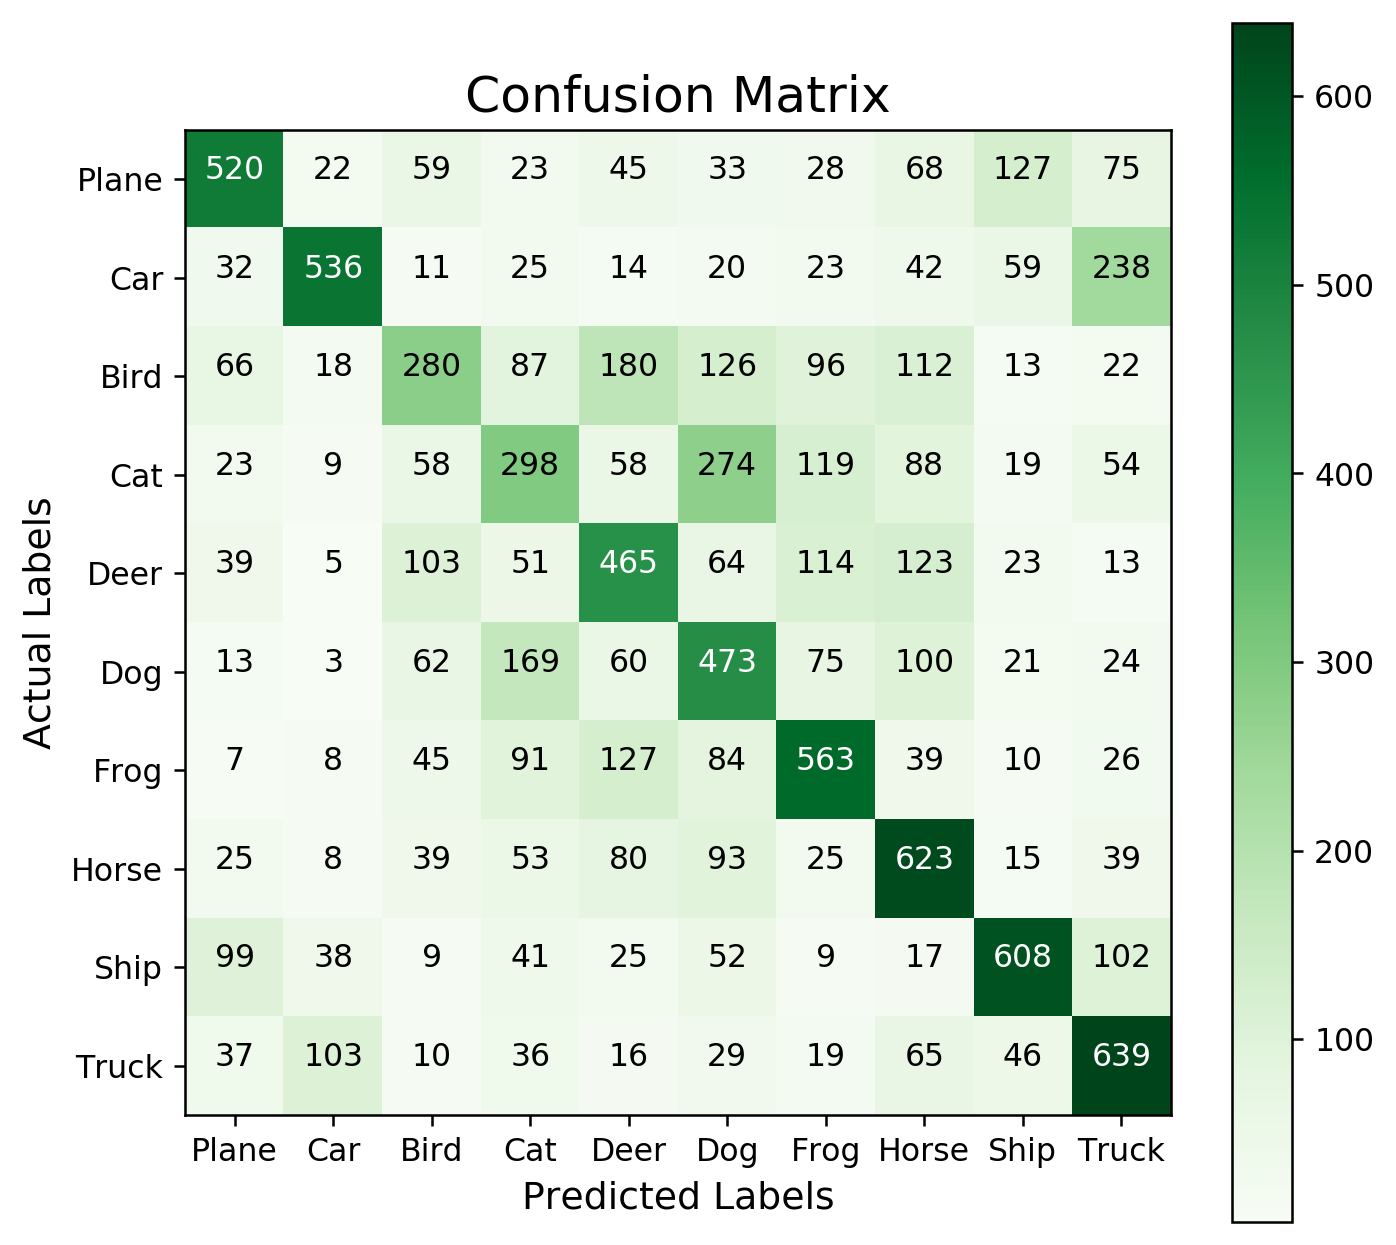

In [97]:
plt.figure(figsize=(7,7), dpi=227)
plt.imshow(conf_matrix, cmap=plt.cm.Greens)

plt.title('Confusion Matrix', fontsize=16)
plt.ylabel('Actual Labels', fontsize=12)
plt.xlabel('Predicted Labels', fontsize=12)

tick_marks = np.arange(NR_CLASSES)
plt.yticks(tick_marks, LABEL_NAME)
plt.xticks(tick_marks, LABEL_NAME)

plt.colorbar()

for i, j  in itertools.product(range(nr_rows), range(nr_cols)):
    plt.text(j, i, conf_matrix[i,j], horizontalalignment ='center',
    color='white' if conf_matrix[i,j] >conf_matrix.max()/2 else 'black')

plt.show

** Provocare: ** Ce reprezintă numerele din diagonala? Ce reprezintă celelalte numere (cu excepția numărului din diagonală) dintr-un singur rând? Încercați să identificați falsele pozitive, falsele negative și adevăratele pozitive din matricea confuziei.

In [98]:
#true positiv
np.diag(conf_matrix)

array([520, 536, 280, 298, 465, 473, 563, 623, 608, 639], dtype=int64)

In [99]:
recall = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)
recall

array([0.52 , 0.536, 0.28 , 0.298, 0.465, 0.473, 0.563, 0.623, 0.608,
       0.639])

### false positiv - este valorile din coloana pe diagonala
### false negativ - sunt valorile din randuri pe verticala 

In [100]:
precision = np.diag(conf_matrix)/ np.sum(conf_matrix, axis=0)
precision

array([0.604, 0.715, 0.414, 0.341, 0.435, 0.379, 0.526, 0.488, 0.646,
       0.519])

In [101]:
avg_recall = np.mean(recall)
print(f'Model 2 recall score is {avg_recall:.2%}' )

Model 2 recall score is 50.05%


** Provocare: ** Calculați precizia medie pentru modelul în ansamblu. Tipăriți acest lucru. Apoi calculați scorul f pentru modelul în ansamblu.

In [107]:
avg_precision = np.mean(precision)
print(f'Model 2 precision score is {avg_precision:.2%}')

f1_score = 2 * (avg_precision * avg_recall) / (avg_precision + avg_recall)
print(f'Model 2 f score is {f1_score:.2%}')

Model 2 precision score is 50.66%
Model 2 f score is 50.35%
